# Signal and Image Processing -

## Loading the dataset

### Mediapipe -
Mediapipe is a popular library with various types of machine learning-based applications, particularly those involving real-time perception of human poses, hand gestures, facial recognition, and more by offering pre-trained models.

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 6.9 MB/s eta 0:00:00


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# directly downloading the dataset from kaggle
!kaggle datasets download -d shrutisaxena/yoga-pose-image-classification-dataset

 98% 982M/0.98G [00:12<00:00, 101MB/s] 
100% 0.98G/0.98G [00:12<00:00, 84.6MB/s]


In [ ]:
# The patool library in Python is  for working with various archive formats, such as zip, rar, etc.
# It is used to extract, compress, and manipulate archive files.
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive("/content/yoga-pose-image-classification-dataset.zip")
!rm /content/yoga-pose-image-classification-dataset.zip

INFO patool: Extracting /content/yoga-pose-image-classification-dataset.zip ...
INFO:patool:Extracting /content/yoga-pose-image-classification-dataset.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_gp3hvl8o -- /content/yoga-pose-image-classification-dataset.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_gp3hvl8o -- /content/yoga-pose-image-classification-dataset.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/yoga-pose-image-classification-dataset.zip extracted to `dataset'.
INFO:patool:... /content/yoga-pose-image-classification-dataset.zip extracted to `dataset'.


## Libraries used

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.color import rgb2lab, lab2rgb
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2

## Extracting the images

In [ ]:
# extracting the paths of all photos from all folders and appending it in a list
dataset_folder = '/content/dataset'
images=[]
subfolders = [f.path for f in os.scandir(dataset_folder) if f.is_dir()]
for subfolder in subfolders:
    image_files = [f.path for f in os.scandir(subfolder) if f.is_file() and f.name.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
    for image_file in image_files:
      print("  Image file:",image_file)
      image_path = f'{image_file}'
      images.append(image_path)

Streaming output truncated to the last 5000 lines.
  Image file: /content/dataset/padmasana/37. figure-06.png
  Image file: /content/dataset/padmasana/37. padmasana-lotus.png
  Image file: /content/dataset/padmasana/20. australia-yoga-life.png
  Image file: /content/dataset/padmasana/29. 6203762f964feb46db2b0fe29de65081.png
  Image file: /content/dataset/padmasana/83. bu_scvmcmaan-np.png
  Image file: /content/dataset/padmasana/16. yoga-lotus-pose-2.png
  Image file: /content/dataset/padmasana/56. screenshot_2018-05-26-12-02-40-79-1.png
  Image file: /content/dataset/padmasana/21. photo-1024x576.png
  Image file: /content/dataset/padmasana/2. ee027-12-lotuspose_shutterstock_ss.png
  Image file: /content/dataset/padmasana/46. main-qimg-44e71ec1e2e5f3062e2760538138e986.jpg
  Image file: /content/dataset/padmasana/44. ashtanga-yoga-dubai-robin-padmasana.1.png
  Image file: /content/dataset/padmasana/51. padmasana.png
  Image file: /content/dataset/padmasana/9. padmasanam.png
  Image file:

In [ ]:
# total number of images in dataset
print(len(images))

5993


In [ ]:
print(images)

['/content/dataset/supta padangusthasana/25-0.png', '/content/dataset/supta padangusthasana/12-0.png', '/content/dataset/supta padangusthasana/86-0.png', '/content/dataset/supta padangusthasana/70-0.png', '/content/dataset/supta padangusthasana/92-0.png', '/content/dataset/supta padangusthasana/61-0.png', '/content/dataset/supta padangusthasana/13-0.png', '/content/dataset/supta padangusthasana/18-0.png', '/content/dataset/supta padangusthasana/11-0.png', '/content/dataset/supta padangusthasana/50-0.png', '/content/dataset/supta padangusthasana/64-0.png', '/content/dataset/supta padangusthasana/46-0.png', '/content/dataset/supta padangusthasana/0-0.png', '/content/dataset/supta padangusthasana/35-0.png', '/content/dataset/supta padangusthasana/19-0.png', '/content/dataset/supta padangusthasana/49-0.png', '/content/dataset/supta padangusthasana/6-0.png', '/content/dataset/supta padangusthasana/62-0.png', '/content/dataset/supta padangusthasana/98-1.png', '/content/dataset/supta padangus

<!-- try and except is there in all code for .gif files -->

## Noise Removal

In [ ]:
# checking if image has variance more than 1000
def has_noise(image, threshold=100):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the variance of the grayscale image
    variance = np.var(gray_image)

    # If the variance exceeds 1000
    return variance > 1000

count = 0
for i in images:
    try:
        image = cv2.imread(i)
        # Check if the image has noise based on variance
        if has_noise(image):
            # Apply Gaussian Blur to remove noise from the image
            noise_removed_image = cv2.GaussianBlur(image, (5, 5), 0)
            count = count + 1
            # Save the processed image
            cv2.imwrite(i, noise_removed_image)
    except Exception as e:
        print(f"Error processing image {i}: {str(e)}")

In [ ]:
# total number of images on which guassian blur is applied
print(count)

## Histogram Equalization


In [ ]:
# normalizing the image -  used in image processing to improve the contrast of an image
# by adjusting the intensity distribution

count = 0
for i in images:
  try:
    image = cv2.imread(i)
    # The reason for converting the images to the LAB color space instead of RGB is because the LAB color space
    # separates image intensity (L channel) from color information (A and B channels).
    img_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB image into L, A, and B channels
    l_channel, a_channel, b_channel = cv2.split(img_lab)

    # Calculate the histogram of the L channel
    hist_original, _ = np.histogram(l_channel.flatten(), 256, [0, 256])
    cdf_original = hist_original.cumsum()
    percentage_darker_side = (cdf_original[128] / cdf_original[-1]) * 100

    # Check if more than 65% of pixels are on the darker side then only do histogram equalization
    if percentage_darker_side >= 65:
        count = count + 1
        l_channel_float = l_channel.astype(float)
        l_channel_equalized = exposure.equalize_hist(l_channel_float)
        l_channel_equalized_uint8 = (l_channel_equalized * 255).astype(np.uint8)

        # Merge the equalized L channel with the original A and B channels
        img_lab_equalized = cv2.merge([l_channel_equalized_uint8, a_channel, b_channel])
        img_equalized_bgr = cv2.cvtColor(img_lab_equalized, cv2.COLOR_LAB2BGR)

        # Save the equalized image back to the original file
        cv2.imwrite(i, img_equalized_bgr)
    else:
        continue
        # print("Histogram equalization not applied, as less than 80% of pixel values are in the darker side.")
        # cv2.imwrite(i, image)
  except Exception as e:
    print(f"Error processing image {image}: {str(e)}")
print(count)

Error processing image None: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing image None: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

543


## Image Augmentation

### need for augmentation -
helps the model learn to recognize objects
1. rotate function - from different viewpoints.
2. zoom function - by a certain scale factor
3. speedup function - randomly speeds up or slows down the input image by resizing it with a random speed factor

In [ ]:
def apply_augmentations(image_path):
    def rotate(image):
      # Randomly select rotation angle between -30 and 30 degrees
        angle = np.random.uniform(-30, 30)
        height, width = image.shape[:2]
        # Compute rotation matrix to rotate around the center of the image
        rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
        return cv2.warpAffine(image, rotation_matrix, (width, height))

    def zoom(image):
        scale_factor = np.random.uniform(0.8, 1.2)
        height, width = image.shape[:2]
        # Compute new height and width after zooming
        new_height, new_width = int(height * scale_factor), int(width * scale_factor)
        return cv2.resize(image, (new_width, new_height))

    def speedup(image):
      # Resize image with speed factor
        speed_factor = np.random.uniform(0.5, 2.0)
        return cv2.resize(image, None, fx=speed_factor, fy=speed_factor)

# Define list of augmentation functions
    aug_functions = [rotate, zoom, speedup]
    np.random.shuffle(aug_functions)

    counter = 0
    original_image = cv2.imread(image_path)

    for fun in aug_functions:
        if np.random.rand() < 0.5:
            original_image = fun(original_image)
            counter += 1

# If at least one augmentation was applied, overwrite the original image file
    if counter > 0:
        cv2.imwrite(image_path, original_image)

In [ ]:
def augment_dataset(dataset_directory):
    for root, dirs, files in os.walk(dataset_directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                apply_augmentations(image_path)


In [ ]:
try:
  dataset_directory = "/content/dataset"
  augment_dataset(dataset_directory)
except Exception as e:
  print("Error")

Error


## Pose Detection

Pose landmarker model: adds a complete mapping of the pose. The model outputs an estimate of 33 3-dimensional pose landmarks.

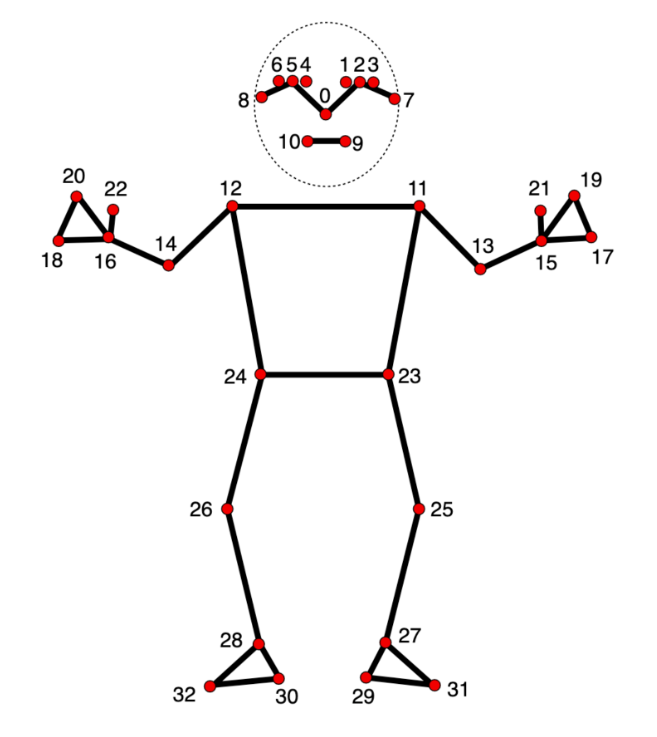

In [ ]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

x and y: Landmark coordinates normalized between 0.0 and 1.0 by the image width (x) and height (y).

z: The landmark depth, with the depth at the midpoint of the hips as the origin. The smaller the value, the closer the landmark is to the camera. The magnitude of z uses roughly the same scale as x.

visibility: The likelihood of the landmark being visible within the image.

In [ ]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    # Retrieve pose landmarks for a specific pose
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

In [ ]:
import csv
# Initialize mediapipe pose detection
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# Define the directory where the dataset is stored
dataset_directory = "dataset"

try:
  for folder_name in os.listdir(dataset_directory):
      folder_path = os.path.join(dataset_directory, folder_name)
      if os.path.isdir(folder_path):
          for image_file in os.listdir(folder_path):
              image_path = os.path.join(folder_path, image_file)
              if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                  image = cv2.imread(image_path)
                  # Process the image to detect landmarks
                  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                  results = pose.process(image_rgb)
                  landmarks = []

                  # Get the label from the folder name
                  label = folder_name
                  # Append the landmarks and label to a CSV file
                  with open('landmarks.csv', 'a', newline='') as f:
                      writer = csv.writer(f)
                      writer.writerow([results.pose_landmarks, label])
except Exception as e:
  print("Error")

Error


In [ ]:
import re
def read_landmarks_from_csv(file_path):
    landmarks_data = []
    labels = []

    with open(file_path, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
          # Extract landmarks string from the first column
            landmarks_str = row[0]
            # Extract label from the second column if available, otherwise use an empty string
            label = row[1] if len(row) > 1 else ''

            landmarks = []
            # Use regular expression to extract x, y, z coordinates of each landmark
            for match in re.finditer(r'x: (\d+\.\d+)\s+y: (\d+\.\d+)\s+z: (-?\d+\.\d+)', landmarks_str):
              # Convert extracted coordinates to float and append to the landmarks list
                x = float(match.group(1))
                y = float(match.group(2))
                z = float(match.group(3))
                landmarks.extend([x, y, z])

            landmarks_data.append(landmarks)
            labels.append(label)

    return landmarks_data, labels

In [ ]:
land, y = read_landmarks_from_csv("/content/landmarks.csv")

In [ ]:
y

['supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta padangusthasana',
 'supta pada